### Natural Language Processing
We will train a supervised training model to predict if a tweet has a positive or negative sentiment.

####  **Dataset loading & dev/test splits**

**1.1) Load the twitter dataset from NLTK library**

In [1]:
import nltk
nltk.download('twitter_samples')
from nltk.corpus import twitter_samples 

[nltk_data] Downloading package twitter_samples to
[nltk_data]     /Users/riyagupta/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


**1.2) Load the positive & negative tweets**

In [2]:
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

**1.3) Create a development & test split (80/20 ratio):**

We will create dataframes for both the positive and negative dataset, so we will add the labels such as :
- Positive dataset : 0 (for label)
- Negative dataset : 1 (for label)

In [3]:
#code here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import os, re, sys
import random
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
df_positive = pd.DataFrame(all_positive_tweets)
df_positive['label'] = 0
df_negative = pd.DataFrame(all_negative_tweets)
df_negative['label'] = 1

In [5]:
df_positive.head()

,0,label
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,0
1,@Lamb2ja Hey James! How odd :/ Please call our...,0
2,@DespiteOfficial we had a listen last night :)...,0
3,@97sides CONGRATS :),0
4,yeaaaah yippppy!!! my accnt verified rqst has...,0


In [6]:
df_negative

,0,label
0,hopeless for tmr :(,1
1,Everything in the kids section of IKEA is so c...,1
2,@Hegelbon That heart sliding into the waste ba...,1
3,"“@ketchBurning: I hate Japanese call him ""bani...",1
4,"Dang starting next week I have ""work"" :(",1
...,...,...
4995,I wanna change my avi but uSanele :(,1
4996,MY PUPPY BROKE HER FOOT :(,1
4997,where's all the jaebum baby pictures :((,1
4998,But but Mr Ahmad Maslan cooks too :( https://t...,1


In [7]:
final_df = pd.concat([df_positive, df_negative])

In [8]:
final_df

,0,label
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,0
1,@Lamb2ja Hey James! How odd :/ Please call our...,0
2,@DespiteOfficial we had a listen last night :)...,0
3,@97sides CONGRATS :),0
4,yeaaaah yippppy!!! my accnt verified rqst has...,0
...,...,...
4995,I wanna change my avi but uSanele :(,1
4996,MY PUPPY BROKE HER FOOT :(,1
4997,where's all the jaebum baby pictures :((,1
4998,But but Mr Ahmad Maslan cooks too :( https://t...,1


In [9]:
final_df.rename(columns={0:'tweets'}, inplace=True)

In [10]:
final_df.head()

,tweets,label
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,0
1,@Lamb2ja Hey James! How odd :/ Please call our...,0
2,@DespiteOfficial we had a listen last night :)...,0
3,@97sides CONGRATS :),0
4,yeaaaah yippppy!!! my accnt verified rqst has...,0


Now we finally have our dataframe **final_df** that has 10000 rows (positive and negative samples) and two columns (tweets and labels)

In [11]:
data = final_df.drop(columns=["label"])
target = final_df["label"]

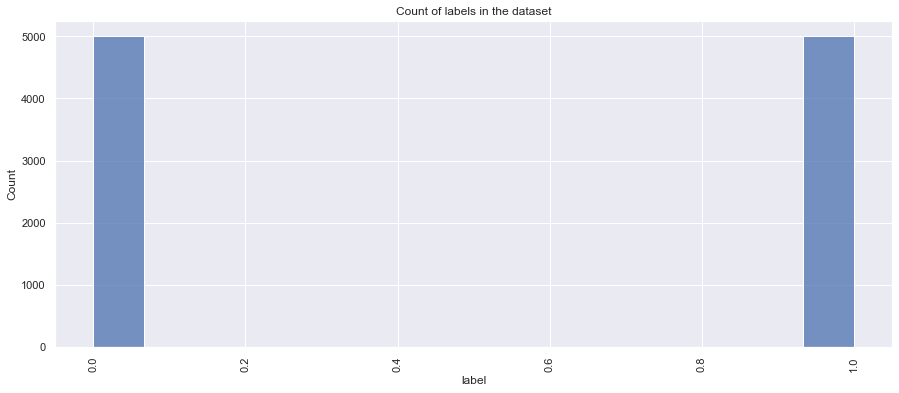

In [12]:
sns.set(rc={'figure.figsize':(15,6)});
sns.histplot(data=final_df,x='label');
plt.xticks(rotation=90);
plt.title("Count of labels in the dataset");

In [13]:
X_dev, X_test, y_dev, y_test = train_test_split(data, target, test_size=0.2, shuffle = True) #test

In [14]:
print("X_dev shape:",X_dev.shape)
print("X_test shape:", X_test.shape)
print("y_dev shape:", y_dev.shape)
print("y_test shape:",y_test.shape)

X_dev shape: (8000, 1)
X_test shape: (2000, 1)
y_dev shape: (8000,)
y_test shape: (2000,)


In [15]:
X_dev.head()

,tweets
1415,Still can't believe I ripped off my nail :-(
4761,mom + :) = horror movie
2551,WAGGA WAGGA FOR PHASE 2 COURSEWORK - COMING AT...
2731,Yes DAD :) https://t.co/edjdMZ78fx
1844,@badoinkofficial i can volunteer as one :p


In [16]:
y_dev.head()

1415    1
4761    0
2551    0
2731    0
1844    0
Name: label, dtype: int64

#### **Data preprocessing**
We will do some data preprocessing before we tokenize the data. We will remove `#` symbol, hyperlinks, stop words & punctuations from the data. You can use the `re` package in python to find and replace these strings. 

**1.4) Replace the `#` symbol with '' in every tweet**

In [17]:
###import nltk packages which removes stopwords and stems the text
import html
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

stopwords = stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/riyagupta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
data.head()

,tweets
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...
1,@Lamb2ja Hey James! How odd :/ Please call our...
2,@DespiteOfficial we had a listen last night :)...
3,@97sides CONGRATS :)
4,yeaaaah yippppy!!! my accnt verified rqst has...


In [19]:
#code here
clean_dev1 = []
clean_test1 = []
for i in X_dev["tweets"]:
    i = re.sub(r"#", "", i)
    clean_dev1.append(i)
for i in X_test["tweets"]:
    i = re.sub(r"#", "", i)
    clean_test1.append(i)
X_dev["tweets"] = clean_dev1
X_test["tweets"] = clean_test1

**1.5) Replace hyperlinks with '' in every tweet**

In [20]:
#code here

clean_dev2 = []
clean_test2 = []
for i in X_dev["tweets"]:
    i = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", i)
    clean_dev2.append(i)
for i in X_test["tweets"]:
    i = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", i)
    clean_test2.append(i)
X_dev["tweets"] = clean_dev2
X_test["tweets"] = clean_test2

**1.6) Remove all stop words**

In [21]:
#code here
clean_dev3 = []
clean_test3 = []

for i in X_dev["tweets"]:
    i = ' '.join(word for word in i.split() if word not in stopwords)
    clean_dev3.append(i)
    
for i in X_test["tweets"]:
    i = ' '.join(word for word in i.split() if word not in stopwords)
    clean_test3.append(i)

X_dev["tweets"] = clean_dev3
X_test["tweets"] = clean_test3

**1.7) Remove all punctuations**

In [22]:
#code here
import emoji

clean_dev4 = []
clean_test4 = []

for i in X_dev["tweets"]:
    i = ''.join(char for char in i if char not in emoji.UNICODE_EMOJI)
    i = re.sub(r"[^a-zA-Z0-9]+"," ",i)
    clean_dev4.append(i)

for i in X_test["tweets"]:
    i = ''.join(char for char in i if char not in emoji.UNICODE_EMOJI)
    i = re.sub(r"[^a-zA-Z0-9]+"," ",i)
    clean_test4.append(i)
    
X_dev["tweets"] = clean_dev4
X_test["tweets"] = clean_test4

**1.8) Apply stemming on the development & test datasets using Porter algorithm**

In [23]:
#code here

ps = PorterStemmer()

clean_dev5 = []
clean_test5 = []

for i in X_dev["tweets"]:
    i = ' '.join(ps.stem(word) for word in i.split())
    clean_dev5.append(i)

for i in X_test["tweets"]:
    i = ' '.join(ps.stem(word) for word in i.split())
    clean_test5.append(i)
    
X_dev["tweets"] = clean_dev5
X_test["tweets"] = clean_test5

Below is the top 5 rows from each development dataset and test dataset, which :
- Do not have punctuations or special characters
- Remove the emojis
- hyperlinks
- #

In [24]:
X_dev.head()

,tweets
1415,still can t believ i rip nail
4761,mom horror movi
2551,wagga wagga for phase 2 coursework come at you d
2731,ye dad
1844,volunt one p


In [25]:
X_test.head()

,tweets
1977,oh mean matur
2744,it s heavi duti benadryl lmao dat shit work i ...
598,today anywayhedidanicejob
1434,i want back
836,i buff leg yet


#### **Model training**

**1.9) Create bag of words features for each tweet in the development dataset**

In [26]:
#code here

from sklearn.feature_extraction.text import CountVectorizer

bow = CountVectorizer()

bow_features = bow.fit_transform(X_dev['tweets'])
bow_features_test = bow.transform(X_test['tweets'])

In [27]:
print("Number of tweets in dev: ", bow_features.shape[0])
print("Total Words in dev: ", bow_features.shape[1])
print("Number of tweets in test: ", bow_features_test.shape[0])
print("Total Words in test: ", bow_features_test.shape[1])

Number of tweets in dev:  8000
Total Words in dev:  8739
Number of tweets in test:  2000
Total Words in test:  8739


In [28]:
X_dev_vect = pd.DataFrame(bow_features.toarray(), columns=bow.get_feature_names())
X_dev_vect.head()

/Users/riyagupta/miniforge3/envs/tf2/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,00128835,009,00962778381838,00am,01,01282,02,02079,...,zonzofox,zoo,zoom,zopiclon,zorroreturm,zumba,zy,zz,zzz,zzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
X_test_vect = pd.DataFrame(bow_features_test.toarray(), columns=bow.get_feature_names())
X_test_vect.head()

/Users/riyagupta/miniforge3/envs/tf2/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,00128835,009,00962778381838,00am,01,01282,02,02079,...,zonzofox,zoo,zoom,zopiclon,zorroreturm,zumba,zy,zz,zzz,zzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**1.10) Train a supervised learning model of choice on the development dataset**

In [30]:
#code here

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model_lr = LogisticRegression()
model_lr.fit(X_dev_vect, y_dev)

y_predicted_test = model_lr.predict(X_test_vect)
y_predicted_dev = model_lr.predict(X_dev_vect)

In [31]:
test_score =  accuracy_score(y_test, y_predicted_test)
dev_score = accuracy_score(y_dev, y_predicted_dev)

In [32]:
from sklearn.metrics import accuracy_score, classification_report

print("Classification Score on Dev dataset:\n")
print("Dev Score : ", dev_score)
print(classification_report(y_dev, y_predicted_dev))
print(confusion_matrix(y_dev, y_predicted_dev))
print("--------------------------------------------------------")
print("Classification Score on Test dataset:\n")
print("Test Score :", test_score)
print(classification_report(y_test, y_predicted_test))
print(confusion_matrix(y_test, y_predicted_test))

Classification Score on Dev dataset:

Dev Score :  0.906375
              precision    recall  f1-score   support

           0       0.92      0.89      0.90      3983
           1       0.90      0.92      0.91      4017

    accuracy                           0.91      8000
   macro avg       0.91      0.91      0.91      8000
weighted avg       0.91      0.91      0.91      8000

[[3551  432]
 [ 317 3700]]
--------------------------------------------------------
Classification Score on Test dataset:

Test Score : 0.7435
              precision    recall  f1-score   support

           0       0.76      0.72      0.74      1017
           1       0.73      0.77      0.75       983

    accuracy                           0.74      2000
   macro avg       0.74      0.74      0.74      2000
weighted avg       0.74      0.74      0.74      2000

[[731 286]
 [227 756]]


**1.11) Create TF-IDF features for each tweet in the development dataset**

In [33]:
#code here

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_features = tfidf.fit_transform(X_dev['tweets'])
tfidf_features_test = tfidf.transform(X_test['tweets'])

**1.12) Train the same supervised learning algorithm on the development dataset with TF-IDF features**

In [34]:
#code here

model_lr_tfidf = LogisticRegression()
model_lr_tfidf.fit(tfidf_features, y_dev)

tfidf_predict_test = model_lr_tfidf.predict(tfidf_features_test)
tfidf_predicted_dev = model_lr.predict(tfidf_features)

/Users/riyagupta/miniforge3/envs/tf2/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


**1.13) Compare the performance of the two models on the test dataset**

In [35]:
#code here

test_score_tfidf =  accuracy_score(y_test, tfidf_predict_test)
dev_score_tfidf = accuracy_score(y_dev, tfidf_predicted_dev)

In [36]:
from sklearn.metrics import accuracy_score, classification_report

print("Classification Score on Dev dataset:\n")
print("Dev Score : ", dev_score_tfidf)
print(classification_report(y_dev, tfidf_predicted_dev))
print(confusion_matrix(y_dev, tfidf_predicted_dev))
print("--------------------------------------------------------")
print("Classification Score on Test dataset:\n")
print("Test Score :", test_score_tfidf)
print(classification_report(y_test, tfidf_predict_test))
print(confusion_matrix(y_test, tfidf_predict_test))

Classification Score on Dev dataset:

Dev Score :  0.914875
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      3983
           1       0.88      0.96      0.92      4017

    accuracy                           0.91      8000
   macro avg       0.92      0.91      0.91      8000
weighted avg       0.92      0.91      0.91      8000

[[3463  520]
 [ 161 3856]]
--------------------------------------------------------
Classification Score on Test dataset:

Test Score : 0.7475
              precision    recall  f1-score   support

           0       0.77      0.73      0.75      1017
           1       0.73      0.77      0.75       983

    accuracy                           0.75      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       0.75      0.75      0.75      2000

[[739 278]
 [227 756]]


In [37]:
print("Logistic Regression using Bag of Words: ",test_score)
print("Logistic Regression using TF-IDF: ", test_score_tfidf)

Logistic Regression using Bag of Words:  0.7435
Logistic Regression using TF-IDF:  0.7475
